# Twitter Sentiment Analysis

-  For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

- Sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import re

In [2]:
df = pd.read_csv("twitter/train.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df["label"].value_counts()
#29,729 non-hatred tweets
# 2242 hatred tweets

0    29720
1     2242
Name: label, dtype: int64

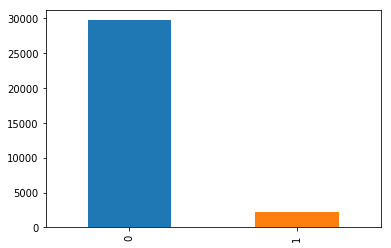

In [5]:
df["label"].value_counts().plot(kind = "bar")
#class imbalance

In [6]:
#check shape of df
df.shape

(31962, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
# Check for NaN values:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
# Check for whitespace strings:
blanks = []

for i,id, lb,tx in df.itertuples():  
        if type(tx)==str:            
            if tx.isspace():         
                blanks.append(i)     
        
len(blanks)

0

In [10]:
df["tweet"].iloc[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [11]:
# transforming words in the Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [12]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [13]:
df['clean_tweet'] = df['tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [14]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cannot u...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
# clean the @ at each tweet

In [16]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = "".join(tweets)
    return tweets

In [17]:
df["clean_tweet"] = df["clean_tweet"].apply(normalizer)

In [18]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [19]:
# extract hashtag

In [20]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = "".join(tweets)
    return tweets

In [21]:
df["hashtag"] = df["tweet"].apply(extract_hashtag)

In [22]:
df.head()

,id,label,tweet,clean_tweet,hashtag
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation


In [23]:
# lemma tweets words

import spacy
nlp = spacy.load('en_core_web_lg')
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create list of punctuation marks
punctuations = string.punctuation

# Create list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS


parser = English()

# tokenizer function
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    # Lemmatizing each token 
    mytokens = [word.lemma_ for word in mytokens]
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    tweets = " ".join(mytokens)
    return tweets

In [24]:
df["lemma"] = df["clean_tweet"].apply(spacy_tokenizer)

In [25]:
df.head()

,id,label,tweet,clean_tweet,hashtag,lemma
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,run,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause the...,lyft disapointed getthanked,thank lyft credit use offer wheelchair van p...
2,3,0,bihday your majesty,bihday your majesty,,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur...,model,model love u u time ur ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation,motivation,factsguide society motivation


In [26]:
df.iloc[0,2]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [27]:
negative = df[df["label"]==1]
positive = df[df["label"]==0]

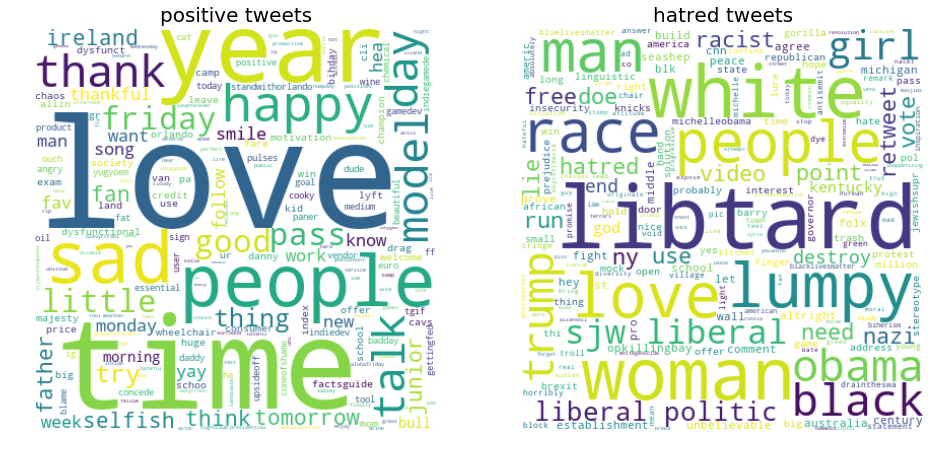

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS.add('amp')
plt.figure(figsize=(16, 8))

cloud1 = WordCloud(width=400, height=400, background_color='white', stopwords=stopwords).generate(str(positive["lemma"]))
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('positive tweets', size=20)

cloud2 = WordCloud(width=400, height=400, background_color='white', stopwords=stopwords).generate(str(negative["lemma"]))
plt.subplot(122)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.title('hatred tweets', size=20)
plt.show()

In [29]:
# cleaning test set

In [30]:
df_test = pd.read_csv("twitter/test.csv")

In [31]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [32]:
# Apostrophe Dictionary
df_test['clean_tweet'] = df_test['tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [33]:
# cleaning @user
df_test["clean_tweet"] = df_test["clean_tweet"].apply(normalizer)

In [34]:
# extract hashtag
df_test["hashtag"] = df_test["tweet"].apply(extract_hashtag)

In [35]:
# lemma
df_test["lemma"] = df_test["clean_tweet"].apply(spacy_tokenizer)

In [36]:
df_test.head()

,id,tweet,clean_tweet,hashtag,lemma
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedic...,studiolife aislife requires passion dedic...,studiolife aislife require passion d...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...,white supremacists birds movie,white supremacist want new bird ...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal ...,acne altwaystoheal healthy healing,safe way heal acne altwaystoheal healt...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,harrypotter pottermore favorite,hp curse child book reservation yes ...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday to my amazing hilarious nephew e...,bihday nephew,rd bihday amaze hilarious nephew eli a...


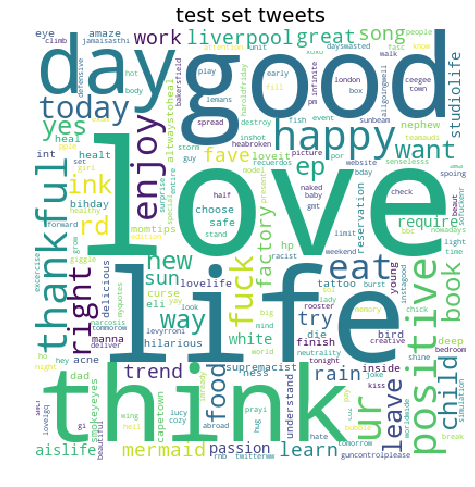

In [37]:

plt.figure(figsize=(16, 8))

cloud3 = WordCloud(width=400, height=400, background_color='white', stopwords=stopwords).generate(str(df_test["lemma"]))
plt.imshow(cloud3)
plt.axis("off")
plt.title('test set tweets', size=20)
plt.show()



In [40]:
# saving training and test set
df.to_csv("twitter_train.csv")

In [41]:
df_test.to_csv("twitter_test.csv")